<a href="https://colab.research.google.com/github/nurin07/Data-Warehousing-and-Data-Mining/blob/main/Lab_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

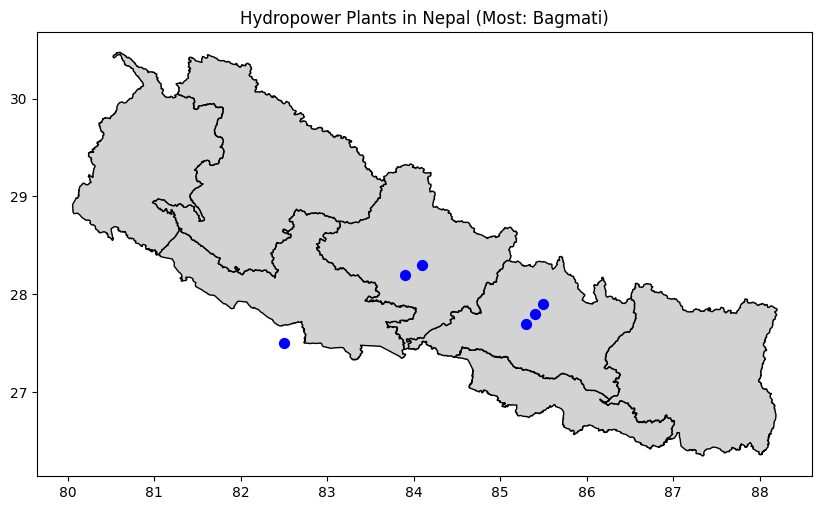

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load province shapefile
provinces = gpd.read_file("/content/province.shp")

# Example hydropower plant data (replace with real data if available)
hydropowers = pd.DataFrame({
    'Province': ['Bagmati', 'Bagmati', 'Gandaki', 'Lumbini', 'Gandaki', 'Bagmati'],
    'Latitude': [27.7, 27.8, 28.2, 27.5, 28.3, 27.9],
    'Longitude': [85.3, 85.4, 83.9, 82.5, 84.1, 85.5]
})

# Count by province
province_counts = hydropowers['Province'].value_counts()
most_common = province_counts.idxmax()

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(ax=ax, color='lightgrey', edgecolor='black')
hydropowers_gdf = gpd.GeoDataFrame(
    hydropowers, geometry=gpd.points_from_xy(hydropowers.Longitude, hydropowers.Latitude), crs=provinces.crs
)
hydropowers_gdf.plot(ax=ax, color='blue', markersize=50)

plt.title(f"Hydropower Plants in Nepal (Most: {most_common})")
plt.show()

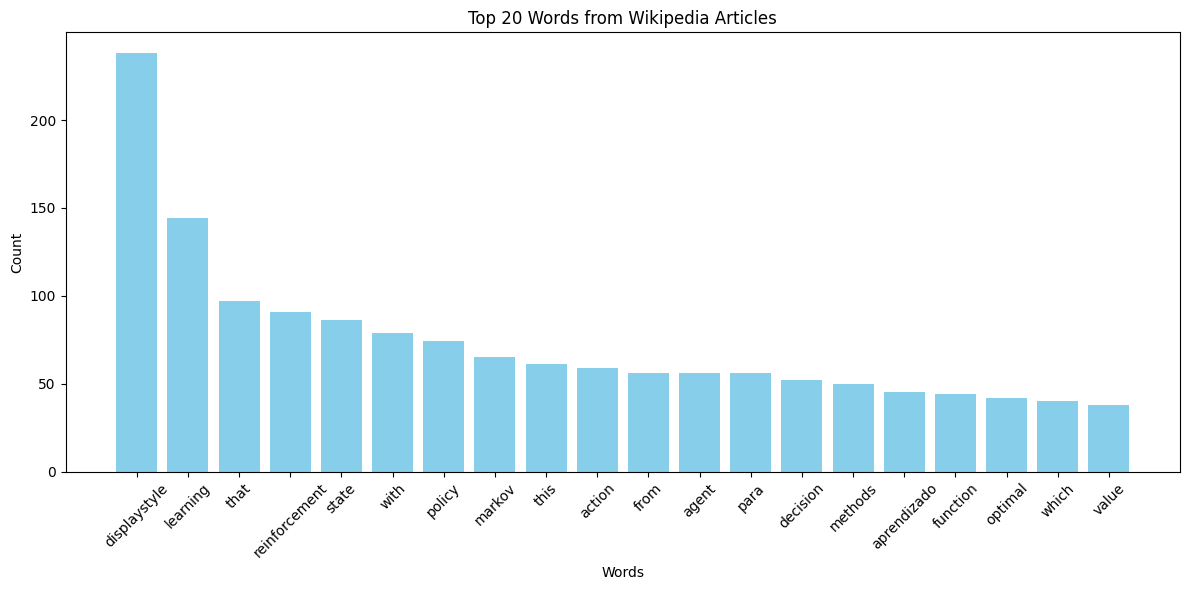

In [ ]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import re

urls = [
    "https://en.wikipedia.org/wiki/Markov_decision_process",
    "https://en.wikipedia.org/wiki/Reinforcement_learning",
    "https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning",
    "https://en.wikipedia.org/wiki/Andrew_Barto",
    "https://en.wikipedia.org/wiki/Richard_S._Sutton",
    "https://pt.wikipedia.org/wiki/Aprendizagem_por_refor%C3%A7o"
]

word_counter = Counter()

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    paragraphs = soup.find_all('p')
    text = " ".join([p.get_text() for p in paragraphs])
    words = re.findall(r'\b[a-zA-Z]{4,}\b', text.lower())
    word_counter.update(words)

# Get top 20
top_words = word_counter.most_common(20)
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Words from Wikipedia Articles")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and split the content into multiple documents
with open("/content/question_3_data.txt", 'r') as f:
    text = f.read()

# Split by paragraph (or you could use: text.split('\n\n'))
documents = [para.strip() for para in text.split('\n') if para.strip()]

# Check how many documents
print(f"Total documents: {len(documents)}")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply clustering (choose k <= number of docs)
num_clusters = 3  # or choose based on len(documents)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Print each cluster's documents
for i in range(num_clusters):
    print(f"\n--- Cluster {i} ---")
    for j, label in enumerate(kmeans.labels_):
        if label == i:
            print(f"- {documents[j][:100]}...")  # print first 100 chars


Total documents: 13

--- Cluster 0 ---
- "When we update any part of a system, we need to make sure we’re not introducing regressions — and i...
- 3 supports the end-to-end evaluation cycle, helping you track performance and ship AI systems to gai...
- Researchers, engineers, practitioners, and policymakers will be able to share their knowledge, insig...

--- Cluster 1 ---
- Squabbling over the EU-China summit next week reflects deep problems at the very core of the pair’s ...
- Brussels – Seeking cooperation with China, but ready to do without Beijing if relations become impos...
- EU-China relations, once largely shaped by pragmatic cooperation, are increasingly defined by rivalr...
- Over 20 years ago, Muse headbands began as an experiment in neurofeedback: The gadget notified the w...
- Beyond its role as the key ingredient in fertilizers that help feed the world’s 8 billion people, am...

--- Cluster 2 ---
- WASHINGTON/SEATTLE, July 17 (Reuters) - A cockpit recording of dialogue b

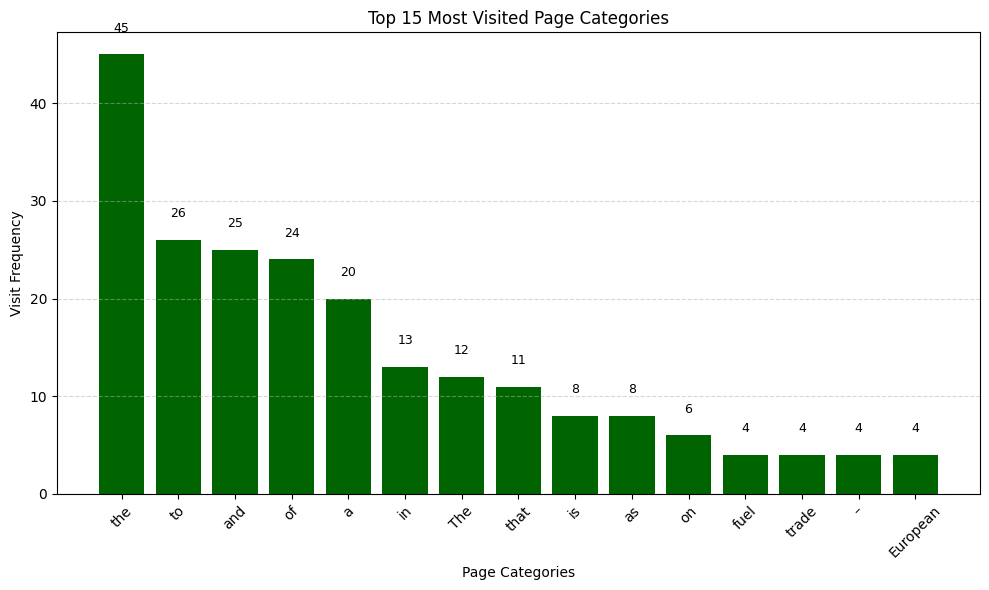

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Load MSNBC browsing data
with open("/content/question_3_data.txt", 'r') as f:
    lines = f.readlines()

# Step 2: Flatten and collect all page categories
all_pages = []
for line in lines:
    categories = line.strip().split()
    all_pages.extend(categories)

# Step 3: Count category frequencies
page_counts = Counter(all_pages)

# Step 4: Filter top N categories (e.g., 15)
top_n = 15
top_categories = page_counts.most_common(top_n)
labels, counts = zip(*top_categories)

# Step 5: Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='darkgreen')
plt.xlabel("Page Categories")
plt.ylabel("Visit Frequency")
plt.title(f"Top {top_n} Most Visited Page Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optional: Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom', fontsize=9)

plt.show()


In [ ]:
from collections import defaultdict

# Step 1: Read the MSNBC dataset
with open("/content/question_3_data.txt", 'r') as f:
    lines = f.readlines()

# Step 2: Count page-to-page transitions
transitions = defaultdict(int)

for line in lines:
    pages = line.strip().split()
    for i in range(len(pages) - 1):
        pair = (pages[i], pages[i + 1])
        transitions[pair] += 1

# Step 3: Sort transitions by frequency
sorted_transitions = sorted(transitions.items(), key=lambda x: x[1], reverse=True)

# Step 4: Print top 20 transitions for inspection
print("Top 20 most common page-to-page transitions:\n")
for i, ((src, tgt), count) in enumerate(sorted_transitions[:20], 1):
    print(f"{i:>2}. {src} → {tgt}  |  Count: {count}")


Top 20 most common page-to-page transitions:

 1. of → the  |  Count: 9
 2. as → a  |  Count: 4
 3. the → world’s  |  Count: 3
 4. supports → the  |  Count: 2
 5. the → captain  |  Count: 2
 6. of → fuel  |  Count: 2
 7. to → the  |  Count: 2
 8. at → the  |  Count: 2
 9. the → fuel  |  Count: 2
10. trade → and  |  Count: 2
11. part → of  |  Count: 2
12. of → a  |  Count: 2
13. next → week  |  Count: 2
14. a → new  |  Count: 2
15. able → to  |  Count: 2
16. in → the  |  Count: 2
17. as → the  |  Count: 2
18. in → a  |  Count: 2
19. a → bilateral  |  Count: 2
20. the → European  |  Count: 2


In [17]:
import plotly.graph_objects as go

sources, targets, values = [], [], []

for (src, tgt), val in sorted_trans:
    sources.append(src)
    targets.append(tgt)
    values.append(val)

# Convert to integer indices
labels = list(set(sources + targets))
label_indices = {label: i for i, label in enumerate(labels)}

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20, color="blue"),
    link=dict(
        source=[label_indices[s] for s in sources],
        target=[label_indices[t] for t in targets],
        value=values
    ))])

fig.update_layout(title_text="Top 30 Page-to-Page Transitions", font_size=10)
fig.show()
